**Applied Data Science Capstone**

# **Switzerland's Secrets**

For Business problem and data sources see report.

## Loading libraries

In [59]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests

import matplotlib.pyplot as plt
from kneed import KneeLocator

## Creation and cleaning of dataframe containing location data, GDP data and population density data

In [2]:
#Load Excel with GDP and population density data, previously downloaded from the Swiss Federal Statistical Office
df = pd.read_excel('je-d-04.02.06.03.xlsx')
df

Bruttoinlandsprodukt (BIP) pro Einwohner Unnamed: 1 Unnamed: 2  \
0                                                 NaN        NaN        NaN   
1                                              Kanton       2008       2009   
2                        In CHF, zu laufenden Preisen        NaN        NaN   
3                                              Zürich     102484    99165.7   
4                                                Bern    75929.7    74447.6   
5                                              Luzern    63088.8    61107.5   
6                                                 Uri    50669.2    50533.6   
7                                              Schwyz    58390.7    58344.6   
8                                            Obwalden    65110.1    63710.1   
9                                           Nidwalden    62467.7      61642   
10                                             Glarus    66252.7      64243   
11                                                Zug     150581     148165   
12                                           Freiburg    61286.5    58791.9   
13                                          Solothurn    66990.3    64266.8   
14                                        Basel-Stadt     166918     163667   
15                                   Basel-Landschaft    69077.9    67464.6   
16                                       Schaffhausen    84555.7    81894.6   
17                                   Appenzell A. Rh.    55814.8    53658.5   
18                                   Appenzell I. Rh.    54938.1    53511.8   
19                                         St. Gallen    73443.8    70661.2   
20                                         Graubünden    67310.2      66992   
21                                             Aargau    66009.6    63611.9   
22                                            Thurgau    60955.3    58565.6   
23                                             Tessin    79913.9    77596.4   
24                                              Waadt    68495.2    67112.1   
25                                             Wallis    53952.6    54486.1   
26                                          Neuenburg    79681.4    74315.4   
27                                               Genf     110122     105928   
28                                               Jura    63202.7    59144.9   
29                                            Schweiz    80428.1    78123.9   
30                                                NaN          .          .   
31  Veränderung gegenüber dem Vorjahr in %, zu lau...        NaN        NaN   
32                                             Zürich          .   -3.23765   
33                                               Bern          .   -1.95192   
34                                             Luzern          .   -3.14055   
35                                                Uri          .   -0.26775   
36                                             Schwyz          .   -0.07901   
37                                           Obwalden          .   -2.15013   
38                                          Nidwalden          .   -1.32175   
39                                             Glarus          .   -3.03344   
40                                                Zug          .   -1.60463   
41                                           Freiburg          .   -4.07052   
42                                          Solothurn          .   -4.06563   
43                                        Basel-Stadt          .   -1.94755   
44                                   Basel-Landschaft          .   -2.33534   
45                                       Schaffhausen          .   -3.14718   
46                                   Appenzell A. Rh.          .    -3.8633   
47                                   Appenzell I. Rh.          .   -2.59614   
48                                         St. Gallen          .   -3.78871   
49                                         Graubünden          

In [3]:
#Column names in line index 2, replace existing column names
df.columns = df.iloc[1]
df

1                                              Kanton     2008     2009  \
0                                                 NaN      NaN      NaN   
1                                              Kanton     2008     2009   
2                        In CHF, zu laufenden Preisen      NaN      NaN   
3                                              Zürich   102484  99165.7   
4                                                Bern  75929.7  74447.6   
5                                              Luzern  63088.8  61107.5   
6                                                 Uri  50669.2  50533.6   
7                                              Schwyz  58390.7  58344.6   
8                                            Obwalden  65110.1  63710.1   
9                                           Nidwalden  62467.7    61642   
10                                             Glarus  66252.7    64243   
11                                                Zug   150581   148165   
12                                           Freiburg  61286.5  58791.9   
13                                          Solothurn  66990.3  64266.8   
14                                        Basel-Stadt   166918   163667   
15                                   Basel-Landschaft  69077.9  67464.6   
16                                       Schaffhausen  84555.7  81894.6   
17                                   Appenzell A. Rh.  55814.8  53658.5   
18                                   Appenzell I. Rh.  54938.1  53511.8   
19                                         St. Gallen  73443.8  70661.2   
20                                         Graubünden  67310.2    66992   
21                                             Aargau  66009.6  63611.9   
22                                            Thurgau  60955.3  58565.6   
23                                             Tessin  79913.9  77596.4   
24                                              Waadt  68495.2  67112.1   
25                                             Wallis  53952.6  54486.1   
26                                          Neuenburg  79681.4  74315.4   
27                                               Genf   110122   105928   
28                                               Jura  63202.7  59144.9   
29                                            Schweiz  80428.1  78123.9   
30                                                NaN        .        .   
31  Veränderung gegenüber dem Vorjahr in %, zu lau...      NaN      NaN   
32                                             Zürich        . -3.23765   
33                                               Bern        . -1.95192   
34                                             Luzern        . -3.14055   
35                                                Uri        . -0.26775   
36                                             Schwyz        . -0.07901   
37                                           Obwalden        . -2.15013   
38                                          Nidwalden        . -1.32175   
39                                             Glarus        . -3.03344   
40                                                Zug        . -1.60463   
41                                           Freiburg        . -4.07052   
42                                          Solothurn        . -4.06563   
43                                        Basel-Stadt        . -1.94755   
44                                   Basel-Landschaft        . -2.33534   
45                                       Schaffhausen        . -3.14718   
46                                   Appenzell A. Rh.        .  -3.8633   
47                                   Appenzell I. Rh.        . -2.59614   
48                                         St. Gallen        . -3.78871   
49                                         Graubünden        . -0.47271   
50                                             Aargau        . -3.63231   
51                                            Thurgau        .  -3.9205   
52                       

In [4]:
#Slice dataframe, keep only columns canton, 2018p (containing GDP numbers) and Population Density
df = df[['Kanton', '2018p', 'Population Density']]
df 

1                                              Kanton    2018p  \
0                                                 NaN      NaN   
1                                              Kanton    2018p   
2                        In CHF, zu laufenden Preisen      NaN   
3                                              Zürich   104820   
4                                                Bern  79114.6   
5                                              Luzern  69256.3   
6                                                 Uri  54290.8   
7                                              Schwyz  62039.7   
8                                            Obwalden  67457.6   
9                                           Nidwalden  73728.6   
10                                             Glarus  69860.3   
11                                                Zug   160884   
12                                           Freiburg    61237   
13                                          Solothurn  68639.7   
14                                        Basel-Stadt   203967   
15                                   Basel-Landschaft  73549.9   
16                                       Schaffhausen  91378.5   
17                                   Appenzell A. Rh.  58807.1   
18                                   Appenzell I. Rh.  64868.1   
19                                         St. Gallen  76218.8   
20                                         Graubünden    73366   
21                                             Aargau  64995.8   
22                                            Thurgau  62739.1   
23                                             Tessin  87612.4   
24                                              Waadt  74060.1   
25                                             Wallis  56627.3   
26                                          Neuenburg    93277   
27                                               Genf   109847   
28                                               Jura  68876.4   
29                                            Schweiz    84518   
30                                                NaN        .   
31  Veränderung gegenüber dem Vorjahr in %, zu lau...      NaN   
32                                             Zürich  4.05533   
33                                               Bern  2.21989   
34                                             Luzern  1.39957   
35                                                Uri  2.63306   
36                                             Schwyz  1.42411   
37                                           Obwalden  1.05902   
38                                          Nidwalden  3.08711   
39                                             Glarus -2.60742   
40                                                Zug  2.67312   
41                                           Freiburg  1.39562   
42                                          Solothurn  1.87836   
43                                        Basel-Stadt  3.27902   
44                                   Basel-Landschaft  1.25403   
45                                       Schaffhausen  3.17102   
46                                   Appenzell A. Rh.  2.91171   
47                                   Appenzell I. Rh.  2.60584   
48                                         St. Gallen  1.32756   
49                                         Graubünden  2.22216   
50                                             Aargau  1.24765   
51                                            Thurgau  1.85066   
52                                             Tessin  4.65895   
53                                              Waadt  4.68586   
54                                             Wallis  3.95191   
55                                          Neuenburg    5.121   
56                                               Genf  3.27905   
57                                               Jura  3.89032   
58                                            Schweiz  2.97512   
59                                      

In [5]:
#Slice dataframe, keep only rows containing the relevant data.
df = df[3:29]
df

1             Kanton    2018p Population Density
3             Zürich   104820                701
4               Bern  79114.6                158
5             Luzern  69256.3                233
6                Uri  54290.8                 33
7             Schwyz  62039.7                143
8           Obwalden  67457.6                 66
9          Nidwalden  73728.6                138
10            Glarus  69860.3                 51
11               Zug   160884                416
12          Freiburg    61237                141
13         Solothurn  68639.7                308
14       Basel-Stadt   203967               5072
15  Basel-Landschaft  73549.9                502
16      Schaffhausen  91378.5                246
17  Appenzell A. Rh.  58807.1                220
18  Appenzell I. Rh.  64868.1                 87
19        St. Gallen  76218.8                222
20        Graubünden    73366                 26
21            Aargau  64995.8                388
22           Thurgau  62739.1                229
23            Tessin  87612.4                110
24             Waadt  74060.1                188
25            Wallis  56627.3                 53
26         Neuenburg    93277                206
27              Genf   109847               1442
28              Jura  68876.4                 82

In [6]:
#rename columns with more understandable terms
df.rename(columns={'Kanton':'Canton', '2018p':'GDP'},inplace=True)
df

C:\Users\schuempm\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


1             Canton      GDP Population Density
3             Zürich   104820                701
4               Bern  79114.6                158
5             Luzern  69256.3                233
6                Uri  54290.8                 33
7             Schwyz  62039.7                143
8           Obwalden  67457.6                 66
9          Nidwalden  73728.6                138
10            Glarus  69860.3                 51
11               Zug   160884                416
12          Freiburg    61237                141
13         Solothurn  68639.7                308
14       Basel-Stadt   203967               5072
15  Basel-Landschaft  73549.9                502
16      Schaffhausen  91378.5                246
17  Appenzell A. Rh.  58807.1                220
18  Appenzell I. Rh.  64868.1                 87
19        St. Gallen  76218.8                222
20        Graubünden    73366                 26
21            Aargau  64995.8                388
22           Thurgau  62739.1                229
23            Tessin  87612.4                110
24             Waadt  74060.1                188
25            Wallis  56627.3                 53
26         Neuenburg    93277                206
27              Genf   109847               1442
28              Jura  68876.4                 82

In [7]:
#Add column with codes. The codes come from the GeoJSON file and will be used as key later on to draw the Choropleth maps.
code = ['CH.ZH','CH.BE','CH.LU','CH.UR','CH.SZ','CH.OW','CH.NW','CH.GL','CH.ZG','CH.FR','CH.SO','CH.BS','CH.BL','CH.SH','CH.AR','CH.AI','CH.SG','CH.GR','CH.AG','CH.TG','CH.TI','CH.VD','CH.VS','CH.NE','CH.GE','CH.JU']
df['Code'] = code
df

<ipython-input-7-cc9f37334400>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Code'] = code


1             Canton      GDP Population Density   Code
3             Zürich   104820                701  CH.ZH
4               Bern  79114.6                158  CH.BE
5             Luzern  69256.3                233  CH.LU
6                Uri  54290.8                 33  CH.UR
7             Schwyz  62039.7                143  CH.SZ
8           Obwalden  67457.6                 66  CH.OW
9          Nidwalden  73728.6                138  CH.NW
10            Glarus  69860.3                 51  CH.GL
11               Zug   160884                416  CH.ZG
12          Freiburg    61237                141  CH.FR
13         Solothurn  68639.7                308  CH.SO
14       Basel-Stadt   203967               5072  CH.BS
15  Basel-Landschaft  73549.9                502  CH.BL
16      Schaffhausen  91378.5                246  CH.SH
17  Appenzell A. Rh.  58807.1                220  CH.AR
18  Appenzell I. Rh.  64868.1                 87  CH.AI
19        St. Gallen  76218.8                222  CH.SG
20        Graubünden    73366                 26  CH.GR
21            Aargau  64995.8                388  CH.AG
22           Thurgau  62739.1                229  CH.TG
23            Tessin  87612.4                110  CH.TI
24             Waadt  74060.1                188  CH.VD
25            Wallis  56627.3                 53  CH.VS
26         Neuenburg    93277                206  CH.NE
27              Genf   109847               1442  CH.GE
28              Jura  68876.4                 82  CH.JU

In [8]:
#check data types in dataframe
df.dtypes

1
Canton                object
GDP                   object
Population Density    object
Code                  object
dtype: object

In [9]:
#reassign data types in columns containing numbers
df[["GDP", "Population Density"]] = df[["GDP", "Population Density"]].apply(pd.to_numeric)
print(df.dtypes)
df

1
Canton                 object
GDP                   float64
Population Density      int64
Code                   object
dtype: object


C:\Users\schuempm\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


1             Canton           GDP  Population Density   Code
3             Zürich  104820.08142                 701  CH.ZH
4               Bern   79114.62118                 158  CH.BE
5             Luzern   69256.29787                 233  CH.LU
6                Uri   54290.76041                  33  CH.UR
7             Schwyz   62039.72437                 143  CH.SZ
8           Obwalden   67457.56564                  66  CH.OW
9          Nidwalden   73728.59797                 138  CH.NW
10            Glarus   69860.27602                  51  CH.GL
11               Zug  160883.54546                 416  CH.ZG
12          Freiburg   61236.99758                 141  CH.FR
13         Solothurn   68639.70042                 308  CH.SO
14       Basel-Stadt  203966.65297                5072  CH.BS
15  Basel-Landschaft   73549.85891                 502  CH.BL
16      Schaffhausen   91378.51408                 246  CH.SH
17  Appenzell A. Rh.   58807.11516                 220  CH.AR
18  Appenzell I. Rh.   64868.07176                  87  CH.AI
19        St. Gallen   76218.83284                 222  CH.SG
20        Graubünden   73365.99599                  26  CH.GR
21            Aargau   64995.81418                 388  CH.AG
22           Thurgau   62739.07927                 229  CH.TG
23            Tessin   87612.35896                 110  CH.TI
24             Waadt   74060.08303                 188  CH.VD
25            Wallis   56627.28938                  53  CH.VS
26         Neuenburg   93276.99261                 206  CH.NE
27              Genf  109846.92223                1442  CH.GE
28              Jura   68876.35124                  82  CH.JU

In [10]:
#Rename certain cantons. Reason: in a number of cantons, there is a city with the same name. Location data should mark the center of the cantons and not the cities. Two cantons have non-unique names with sister locations in Germany and France.
df.replace({'Zürich':'Kanton Zürich', 'Bern':'Kanton Bern', 'Luzern':'Kanton Luzern', 'Zug':'Kanton Zug', 'Freiburg':'Canton de Fribourg', 'Solothurn':'Kanton Solothurn','Schaffhausen':'Kanton Schaffhausen', 'St. Gallen':'Kanton St. Gallen', 'Neuenburg':'Canton de Neuchâtel', 'Genf':'Canton de Genève', 'Jura':'Canton de Jura'}, inplace=True)
df

C:\Users\schuempm\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


1                Canton           GDP  Population Density   Code
3         Kanton Zürich  104820.08142                 701  CH.ZH
4           Kanton Bern   79114.62118                 158  CH.BE
5         Kanton Luzern   69256.29787                 233  CH.LU
6                   Uri   54290.76041                  33  CH.UR
7                Schwyz   62039.72437                 143  CH.SZ
8              Obwalden   67457.56564                  66  CH.OW
9             Nidwalden   73728.59797                 138  CH.NW
10               Glarus   69860.27602                  51  CH.GL
11           Kanton Zug  160883.54546                 416  CH.ZG
12   Canton de Fribourg   61236.99758                 141  CH.FR
13     Kanton Solothurn   68639.70042                 308  CH.SO
14          Basel-Stadt  203966.65297                5072  CH.BS
15     Basel-Landschaft   73549.85891                 502  CH.BL
16  Kanton Schaffhausen   91378.51408                 246  CH.SH
17     Appenzell A. Rh.   58807.11516                 220  CH.AR
18     Appenzell I. Rh.   64868.07176                  87  CH.AI
19    Kanton St. Gallen   76218.83284                 222  CH.SG
20           Graubünden   73365.99599                  26  CH.GR
21               Aargau   64995.81418                 388  CH.AG
22              Thurgau   62739.07927                 229  CH.TG
23               Tessin   87612.35896                 110  CH.TI
24                Waadt   74060.08303                 188  CH.VD
25               Wallis   56627.28938                  53  CH.VS
26  Canton de Neuchâtel   93276.99261                 206  CH.NE
27     Canton de Genève  109846.92223                1442  CH.GE
28       Canton de Jura   68876.35124                  82  CH.JU

In [11]:
#get coordinates of the cantons
#disable TLS certificaton verification (after having problems with SSL certificate)

"""import ssl

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
geopy.geocoders.options.default_ssl_context = ctx"""

#import rate limiter to slow down request rate
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="my_query")
 
location = geolocator.geocode(df['Canton'])

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

#download location data and add to df in new column location
df['location'] = df['Canton'].apply(geocode) 

#extract latitude and longitude from column location and write in separate columns Lat and Lon
df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['Lon'] = df['location'].apply(lambda x: x.longitude if x else None)
 
df

<ipython-input-11-8738c6c54785>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['Canton'].apply(geocode)
<ipython-input-11-8738c6c54785>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
<ipython-input-11-8738c6c54785>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

1                Canton           GDP  Population Density   Code  \
3         Kanton Zürich  104820.08142                 701  CH.ZH   
4           Kanton Bern   79114.62118                 158  CH.BE   
5         Kanton Luzern   69256.29787                 233  CH.LU   
6                   Uri   54290.76041                  33  CH.UR   
7                Schwyz   62039.72437                 143  CH.SZ   
8              Obwalden   67457.56564                  66  CH.OW   
9             Nidwalden   73728.59797                 138  CH.NW   
10               Glarus   69860.27602                  51  CH.GL   
11           Kanton Zug  160883.54546                 416  CH.ZG   
12   Canton de Fribourg   61236.99758                 141  CH.FR   
13     Kanton Solothurn   68639.70042                 308  CH.SO   
14          Basel-Stadt  203966.65297                5072  CH.BS   
15     Basel-Landschaft   73549.85891                 502  CH.BL   
16  Kanton Schaffhausen   91378.51408                 246  CH.SH   
17     Appenzell A. Rh.   58807.11516                 220  CH.AR   
18     Appenzell I. Rh.   64868.07176                  87  CH.AI   
19    Kanton St. Gallen   76218.83284                 222  CH.SG   
20           Graubünden   73365.99599                  26  CH.GR   
21               Aargau   64995.81418                 388  CH.AG   
22              Thurgau   62739.07927                 229  CH.TG   
23               Tessin   87612.35896                 110  CH.TI   
24                Waadt   74060.08303                 188  CH.VD   
25               Wallis   56627.28938                  53  CH.VS   
26  Canton de Neuchâtel   93276.99261                 206  CH.NE   
27     Canton de Genève  109846.92223                1442  CH.GE   
28       Canton de Jura   68876.35124                  82  CH.JU   

1                                            location        Lat       Lon  
3   (Zürich, Schweiz/Suisse/Svizzera/Svizra, (47.4...  47.413302  8.656394  
4   (Bern/Berne, Schweiz/Suisse/Svizzera/Svizra, (...  46.838235  7.600450  
5   (Luzern, Schweiz/Suisse/Svizzera/Svizra, (47.0...  47.090821  8.171961  
6   (Uri, Schweiz/Suisse/Svizzera/Svizra, (46.7864...  46.786441  8.642016  
7   (Schwyz, Schweiz/Suisse/Svizzera/Svizra, (47.0...  47.057198  8.722207  
8   (Obwalden, Schweiz/Suisse/Svizzera/Svizra, (46...  46.861386  8.206782  
9   (Nidwalden, Schweiz/Suisse/Svizzera/Svizra, (4...  46.942756  8.411977  
10  (Glarus, Schweiz/Suisse/Svizzera/Svizra, (46.9...  46.979656  9.108812  
11  (Zug, Schweiz/Suisse/Svizzera/Svizra, (47.1486...  47.148614  8.553938  
12  (Fribourg/Freiburg, Schweiz/Suisse/Svizzera/Sv...  46.678912  7.102711  
13  (Solothurn, Schweiz/Suisse/Svizzera/Svizra, (4...  47.318740  7.669828  
14  (Basel-Stadt, Schweiz/Suisse/Svizzera/Svizra, ...  47.557910  7.592773  
15  (Basel-Landschaft, Schweiz/Suisse/Svizzera/Svi...  47.509294  7.658833  
16  (Schaffhausen, Schweiz/Suisse/Svizzera/Svizra,...  47.697108  8.634721  
17  (Wasserscheide Rotbach/Rhein (955m), Gais, Mit...  47.359560  9.480595  
18  (Rheinburg-Klinik Walzenhausen, 113, Dorf, Wil...  47.451031  9.605277  
19  (Sankt Gallen, Schweiz/Suisse/Svizzera/Svizra,...  47.156105  9.338323  
20  (Graubünden/Grischun/Grigioni, Schweiz/Suisse/...  46.696061  9.602735  
21  (Aargau, Schweiz/Suisse/Svizzera/Svizra, (47.4...  47.412396  8.194832  
22  (Thurgau, Schweiz/Suisse/Svizzera/Svizra, (47....  47.585965  9.142877  
23  (Ticino, Schweiz/Suisse/Svizzera/Svizra, (46.3...  46.335191  8.752590  
24  (Vaud, Schweiz/Suisse/Svizzera/Svizra, (46.635...  46.635696  6.532072  
25  (Valais/Wallis, Schweiz/Suisse/Svizzera/Svizra...  46.230306  7.660576  
26  (Neuchâtel, Schweiz/Suisse/Svizzera/Svizra, (4...  47.009925  6.824381  
27  (Genève, Schweiz/Suisse/Svizzera/Svizra, (46.2...  46.225651  6.143921  
28  (Le Jura, Chevenez, Haute-Ajoie, District de P...  47.390744  6.992178

In [12]:
#get latitude and longitude for Switzerland

address = 'Switzerland'

geolocator = Nominatim(user_agent="Switzerland")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('geograpical coordinates Switzerland: {}, {}.'.format(latitude, longitude))

geograpical coordinates Switzerland: 46.813331250000005, 8.444947437939408.


In [13]:
#load GeoJSON file for canton borders, downloaded from GADM.org
geojson = 'gadm36_CHE_1.json'

In [14]:
#draw map of Switzerland with cantons and markers for each canton
map = folium.Map([latitude, longitude], zoom_start=8)

folium.GeoJson(geojson).add_to(map)

# add neighborhood markers to map
for lat, lng, Canton in zip(df['Lat'], df['Lon'], df['Canton']):
    label = '{}, {}'.format(df, Canton)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    
map

## Choropleth maps of Switzerland displaying GDP and population density per canton

In [47]:
#draw Choropleth map of Switzerland for GDP data

#create bins for the coloring along GDP quantiles
gdp_bins = df['GDP'].quantile([0, 0.25, 0.5, 0.75, 1])

gdp_map = folium.Map([latitude, longitude], zoom_start=8)

folium.Choropleth(
    geo_data=geojson,
    name ='Choropleth',
    data = df,
    columns=["Code", "GDP"],
    key_on="feature.properties.HASC_1",
    fill_color="Blues",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="GDP",
    bins=gdp_bins,
    reset=True,
).add_to(gdp_map)

gdp_map

In [49]:
#draw Choropleth map of Switzerland for population density data

#create bins for the coloring along population density quantiles
pop_bins = df['Population Density'].quantile([0, 0.25, 0.5, 0.75, 1])

pop_map = folium.Map([latitude, longitude], zoom_start=8)

folium.Choropleth(
    geo_data=geojson,
    name ='Choropleth',
    data = df,
    columns=["Code", "Population Density"],
    key_on="feature.properties.HASC_1",
    fill_color="Reds",
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="Population Density",
    bins=pop_bins,
    reset=True,
).add_to(pop_map)

pop_map

## Foursquare Location data

In [1]:
CLIENT_ID = '' # my Foursquare ID
CLIENT_SECRET = '' # my Foursquare Secret
ACCESS_TOKEN = '' #my access token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 40000 #40 km

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('ACCESS_TOKEN:' + ACCESS_TOKEN)

Credentials:
CLIENT_ID: 
CLIENT_SECRET:
ACCESS_TOKEN:


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=40000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Canton', 
                  'Canton Latitude', 
                  'Canton Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

venues = getNearbyVenues(names=df['Canton'], latitudes=df['Lat'], longitudes=df['Lon'], radius=40000)


Kanton Zürich
Kanton Bern
Kanton Luzern
Uri
Schwyz
Obwalden
Nidwalden
Glarus
Kanton Zug
Canton de Fribourg
Kanton Solothurn
Basel-Stadt
Basel-Landschaft
Kanton Schaffhausen
Appenzell A. Rh.
Appenzell I. Rh.
Kanton St. Gallen
Graubünden
Aargau
Thurgau
Tessin
Waadt
Wallis
Canton de Neuchâtel
Canton de Genève
Canton de Jura


In [21]:
#check dataframe
print(venues.shape)
venues.head()

(2600, 7)


Canton  Canton Latitude  Canton Longitude  \
0  Kanton Zürich        47.413302          8.656394   
1  Kanton Zürich        47.413302          8.656394   
2  Kanton Zürich        47.413302          8.656394   
3  Kanton Zürich        47.413302          8.656394   
4  Kanton Zürich        47.413302          8.656394   

                         Venue  Venue Latitude  Venue Longitude  \
0            Restaurant Rössli       47.422325         8.628913   
1           Globus Delicatessa       47.408403         8.595709   
2                   Schokolato       47.410156         8.595085   
3                Masoala Halle       47.384513         8.578365   
4  Kaeng Krachan Elefantenpark       47.388374         8.577168   

     Venue Category  
0  Swiss Restaurant  
1      Gourmet Shop  
2    Breakfast Spot  
3       Zoo Exhibit  
4       Zoo Exhibit

In [22]:
#check unique categories
print('{} unique categories.'.format(len(venues['Venue Category'].unique())))

189 unique categories.


In [23]:
#Venue categories and occurrences per canton, grouped by cantons

# one hot encoding
CH_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
CH_onehot['Canton'] = venues['Canton'] 

# move neighborhood column to the first column
fixed_columns = [CH_onehot.columns[-1]] + list(CH_onehot.columns[:-1])
CH_onehot = CH_onehot[fixed_columns]

CH_grouped = CH_onehot.groupby('Canton').mean().reset_index()
CH_grouped

Canton  Accessories Store  Airport  Airport Lounge  \
0                Aargau               0.01     0.00            0.00   
1      Appenzell A. Rh.               0.00     0.00            0.00   
2      Appenzell I. Rh.               0.00     0.00            0.00   
3      Basel-Landschaft               0.00     0.00            0.00   
4           Basel-Stadt               0.00     0.00            0.00   
5    Canton de Fribourg               0.00     0.01            0.00   
6      Canton de Genève               0.00     0.00            0.00   
7        Canton de Jura               0.00     0.01            0.00   
8   Canton de Neuchâtel               0.00     0.01            0.00   
9                Glarus               0.00     0.00            0.00   
10           Graubünden               0.00     0.00            0.00   
11          Kanton Bern               0.00     0.00            0.00   
12        Kanton Luzern               0.00     0.00            0.00   
13  Kanton Schaffhausen               0.01     0.01            0.05   
14     Kanton Solothurn               0.00     0.00            0.00   
15    Kanton St. Gallen               0.00     0.00            0.00   
16           Kanton Zug               0.00     0.00            0.00   
17        Kanton Zürich               0.01     0.00            0.01   
18            Nidwalden               0.00     0.00            0.00   
19             Obwalden               0.00     0.00            0.00   
20               Schwyz               0.00     0.00            0.00   
21               Tessin               0.00     0.00            0.00   
22              Thurgau               0.00     0.00            0.00   
23                  Uri               0.00     0.00            0.00   
24                Waadt               0.00     0.01            0.00   
25               Wallis               0.00     0.00            0.00   

    American Restaurant  Apres Ski Bar  Argentinian Restaurant  Art Gallery  \
0                  0.00           0.00                    0.00         0.00   
1                  0.00           0.00                    0.00         0.00   
2                  0.00           0.00                    0.00         0.00   
3                  0.01           0.00                    0.00         0.02   
4                  0.01           0.00                    0.00         0.02   
5                  0.00           0.00                    0.00         0.00   
6                  0.00           0.00                    0.00         0.01   
7                  0.00           0.00                    0.00         0.00   
8                  0.00           0.00                    0.00         0.00   
9                  0.01           0.00                    0.00         0.00   
10                 0.00           0.01                    0.00         0.00   
11                 0.00           0.00                    0.00         0.01   
12                 0.00           0.00                    0.00         0.00   
13                 0.00           0.00                    0.01         0.00   
14                 0.00           0.00                    0.00         0.01   
15                 0.00           0.00                    0.00         0.00   
16                 0.00           0.00                    0.00         0.00   
17                 0.00           0.00                    0.00         0.00   
18                 0.00           0.00                    0.00         0.00   
19                 0.00           0.00                    0.00         0.00   
20                 0.00           0.00                    0.00         0.00   
21                 0.00           0.00                    0.00         0.00   
22                 0.00           0.00                    0.00         0.00   
23                 0.00           0.00                    0.00         0.00   
24                 0.00           0.00                    0.01         0.00   
25                 0.00           0.04       

In [24]:
#Top 10 venues per canton

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Canton']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Canton'] = CH_grouped['Canton']

for ind in np.arange(CH_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(CH_grouped.iloc[ind, :], num_top_venues)

print(venues_sorted.shape)
venues_sorted.head()

(26, 11)


Canton 1st Most Common Venue 2nd Most Common Venue  \
0            Aargau                  Park                  Café   
1  Appenzell A. Rh.                 Hotel      Swiss Restaurant   
2  Appenzell I. Rh.                 Hotel            Restaurant   
3  Basel-Landschaft                  Park                 Hotel   
4       Basel-Stadt                  Park                 Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery      Swiss Restaurant                  Pool   
1            Restaurant                  Café    Italian Restaurant   
2                  Café      Swiss Restaurant     German Restaurant   
3                  Café            Art Museum      Swiss Restaurant   
4            Art Museum                  Café      Swiss Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Bar                 Hotel                 Plaza   
1   Austrian Restaurant        Scenic Lookout           Coffee Shop   
2   Austrian Restaurant    Italian Restaurant                   Bar   
3                 Plaza           Supermarket                   Bar   
4           Supermarket                 Plaza                   Bar   

  9th Most Common Venue         10th Most Common Venue  
0   Japanese Restaurant  Vegetarian / Vegan Restaurant  
1              Ski Area              German Restaurant  
2           Coffee Shop                 Scenic Lookout  
3        Scenic Lookout                   Concert Hall  
4          Concert Hall                         Bakery

## Kmeans clustering

In [25]:
#Determination of number of clusters

# set number of clusters for starters
kclusters = 3

CH_grouped_clustering = CH_grouped.drop('Canton', 1)

# run k-means clustering iteratively, max 10 runs with 300 iterations each
kmeans = KMeans(n_clusters=kclusters, n_init=10, max_iter=300, random_state=42)

kmeans.fit(CH_grouped_clustering)

# cluster assignments
kmeans.labels_[0:10] 

array([2, 0, 0, 2, 2, 0, 2, 2, 2, 1])

In [30]:
#Find appropriate number of clusters with elbow method
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(CH_grouped_clustering)
    sse.append(kmeans.inertia_)

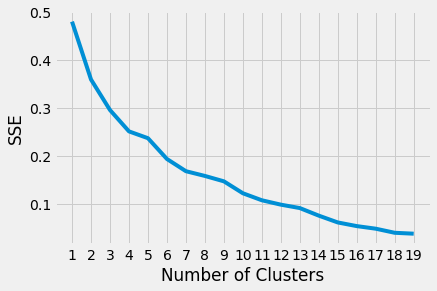

In [31]:
#plot SSE over clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [50]:
#calculate number of clusters with KneeLocator
kl = KneeLocator(
     range(1, 20), sse, curve="convex", direction="decreasing"
     )

kclusters = kl.elbow
kclusters

7

In [35]:
# generate 7 clusters

CH_grouped_clustering = CH_grouped.drop('Canton', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)

kmeans.fit(CH_grouped_clustering)

# cluster assignments
kmeans.labels_[0:10] 

array([2, 1, 1, 5, 5, 1, 4, 3, 1, 6])

In [36]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=False)

venues_sorted.head()

Cluster Labels            Canton 1st Most Common Venue  \
0               2            Aargau                  Park   
1               1  Appenzell A. Rh.                 Hotel   
2               1  Appenzell I. Rh.                 Hotel   
3               5  Basel-Landschaft                  Park   
4               5       Basel-Stadt                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Café                Bakery      Swiss Restaurant   
1      Swiss Restaurant            Restaurant                  Café   
2            Restaurant                  Café      Swiss Restaurant   
3                 Hotel                  Café            Art Museum   
4                 Hotel            Art Museum                  Café   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                  Pool                   Bar                 Hotel   
1    Italian Restaurant   Austrian Restaurant        Scenic Lookout   
2     German Restaurant   Austrian Restaurant    Italian Restaurant   
3      Swiss Restaurant                 Plaza           Supermarket   
4      Swiss Restaurant           Supermarket                 Plaza   

  8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
0                 Plaza   Japanese Restaurant  Vegetarian / Vegan Restaurant  
1           Coffee Shop              Ski Area              German Restaurant  
2                   Bar           Coffee Shop                 Scenic Lookout  
3                   Bar        Scenic Lookout                   Concert Hall  
4                   Bar          Concert Hall                         Bakery

In [37]:
#combine dataframes 
df = df.join(venues_sorted.set_index('Canton'), on='Canton')
df.head()

Canton           GDP  Population Density   Code  \
3  Kanton Zürich  104820.08142                 701  CH.ZH   
4    Kanton Bern   79114.62118                 158  CH.BE   
5  Kanton Luzern   69256.29787                 233  CH.LU   
6            Uri   54290.76041                  33  CH.UR   
7         Schwyz   62039.72437                 143  CH.SZ   

                                            location        Lat       Lon  \
3  (Zürich, Schweiz/Suisse/Svizzera/Svizra, (47.4...  47.413302  8.656394   
4  (Bern/Berne, Schweiz/Suisse/Svizzera/Svizra, (...  46.838235  7.600450   
5  (Luzern, Schweiz/Suisse/Svizzera/Svizra, (47.0...  47.090821  8.171961   
6  (Uri, Schweiz/Suisse/Svizzera/Svizra, (46.7864...  46.786441  8.642016   
7  (Schwyz, Schweiz/Suisse/Svizzera/Svizra, (47.0...  47.057198  8.722207   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3               2      Swiss Restaurant                  Café   
4               5                  Café                  Park   
5               0                 Hotel              Mountain   
6               0                 Hotel              Mountain   
7               0                 Hotel                  Pool   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3                  Pool                  Park                Bakery   
4                 Hotel                   Bar                 Plaza   
5      Swiss Restaurant            Restaurant                  Park   
6              Ski Area        Scenic Lookout      Swiss Restaurant   
7                  Park      Swiss Restaurant              Mountain   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3                 Hotel                   Bar                 Plaza   
4      Swiss Restaurant         Train Station            Restaurant   
5         Shopping Mall                  Café        Scenic Lookout   
6         Train Station                 Trail                Bridge   
7            Restaurant              Ski Area        Scenic Lookout   

  9th Most Common Venue         10th Most Common Venue  
3   Japanese Restaurant  Vegetarian / Vegan Restaurant  
4        Ice Cream Shop                   Tram Station  
5         Train Station                         Bridge  
6             Hotel Bar                           Pool  
7            Waterfront                 Farmers Market

## Results

### Choropleth map with canton clustering

In [67]:
#draw Choropleth map of Switzerland with canton clustering


cluster_map = folium.Map([latitude, longitude], zoom_start=8)

folium.Choropleth(
    geo_data=geojson,
    name ='Choropleth',
    data = df,
    columns=["Code", "Cluster Labels"],
    key_on="feature.properties.HASC_1",
    fill_color="Oranges",
    fill_opacity=0.9,
    line_opacity=0.5,
    legend_name="Canton Clusters",
    #bins=pop_bins,
    reset=True,
).add_to(cluster_map)

#add markers with pop-up labeling
for lat, lon, poi, cluster in zip(df['Lat'], df['Lon'], df['Canton'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='white',
        fill=True,
        fill_color='white',
        fill_opacity=0.7).add_to(cluster_map)

cluster_map

### Summary table of top 10 venues per canton

In [39]:
Summ0 = df.loc[df['Cluster Labels'] == 0, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ1 = df.loc[df['Cluster Labels'] == 1, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ2 = df.loc[df['Cluster Labels'] == 2, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ3 = df.loc[df['Cluster Labels'] == 3, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ4 = df.loc[df['Cluster Labels'] == 4, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ5 = df.loc[df['Cluster Labels'] == 5, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ6 = df.loc[df['Cluster Labels'] == 6, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ7 = df.loc[df['Cluster Labels'] == 7, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ8 = df.loc[df['Cluster Labels'] == 8, df.columns[[0] + list(range(7, df.shape[1]))]]
Summ9 = df.loc[df['Cluster Labels'] == 9, df.columns[[0] + list(range(7, df.shape[1]))]]

Summ = [Summ0, Summ1, Summ2, Summ3, Summ4, Summ5, Summ6, Summ7, Summ8, Summ9]
Summary = pd.concat(Summ)
Summary

Canton  Cluster Labels 1st Most Common Venue  \
5         Kanton Luzern               0                 Hotel   
6                   Uri               0                 Hotel   
7                Schwyz               0                 Hotel   
8              Obwalden               0                 Hotel   
9             Nidwalden               0                 Hotel   
11           Kanton Zug               0                 Hotel   
12   Canton de Fribourg               1                 Hotel   
17     Appenzell A. Rh.               1                 Hotel   
18     Appenzell I. Rh.               1                 Hotel   
19    Kanton St. Gallen               1      Swiss Restaurant   
22              Thurgau               1                 Hotel   
23               Tessin               1                 Hotel   
26  Canton de Neuchâtel               1                  Café   
3         Kanton Zürich               2      Swiss Restaurant   
16  Kanton Schaffhausen               2      Swiss Restaurant   
21               Aargau               2                  Park   
28       Canton de Jura               3         Train Station   
24                Waadt               4     French Restaurant   
27     Canton de Genève               4     French Restaurant   
4           Kanton Bern               5                  Café   
13     Kanton Solothurn               5      Swiss Restaurant   
14          Basel-Stadt               5                  Park   
15     Basel-Landschaft               5                  Park   
10               Glarus               6      Swiss Restaurant   
20           Graubünden               6                 Hotel   
25               Wallis               6              Ski Area   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5               Mountain      Swiss Restaurant            Restaurant   
6               Mountain              Ski Area        Scenic Lookout   
7                   Pool                  Park      Swiss Restaurant   
8       Swiss Restaurant              Mountain         Train Station   
9       Swiss Restaurant              Mountain              Ski Area   
11                  Park                  Pool      Swiss Restaurant   
12      Swiss Restaurant                  Café     French Restaurant   
17      Swiss Restaurant            Restaurant                  Café   
18            Restaurant                  Café      Swiss Restaurant   
19                 Hotel            Restaurant                  Café   
22      Swiss Restaurant                  Café     German Restaurant   
23    Italian Restaurant      Swiss Restaurant                 Plaza   
26                 Hotel            Restaurant      Swiss Restaurant   
3                   Café                  Pool                  Park   
16                 Hotel                  Café        Airport Lounge   
21                  Café                Bakery      Swiss Restaurant   
28           Supermarket                 Hotel                  Café   
24                  Park                   Bar            Restaurant   
27                 Hotel                  Park                   Bar   
4                   Park                 Hotel                   Bar   
13                   Bar                 Hotel                  Café   
14                 Hotel            Art Museum                  Café   
15                 Hotel                  Café            Art Museum   
10                 Hotel              Ski Area            Restaurant   
20              Ski Area            Restaurant      Swiss Restaurant   
25      Swiss Restaurant                 Hotel            Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5                   Park         Shopping Mall                  Café   
6       Swiss Restaurant         Train Station                 Trail   
7               Mountain            Restaurant              Ski Area   
8                   Park    